<a href="https://colab.research.google.com/github/Jayraj-Khinvasara/Analysis-using-ML/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Drop rows with missing values
df = df.dropna()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in ['Product Category', 'Region', 'Payment Method']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Feature selection for clustering
X = df[['Units Sold', 'Unit Price', 'Total Revenue', 'Region', 'Payment Method']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


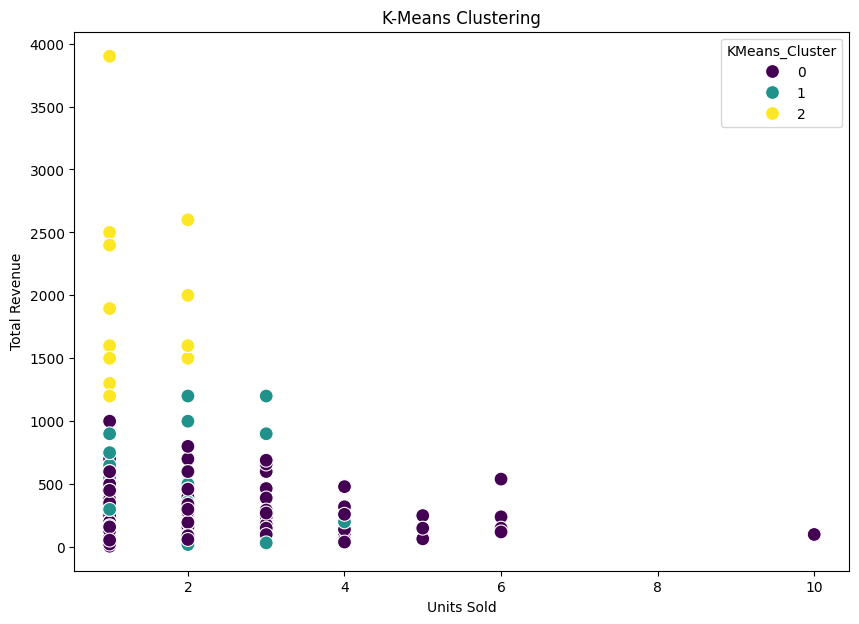

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['KMeans_Cluster'] = kmeans_labels

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Units Sold', y='Total Revenue', hue='KMeans_Cluster', data=df, palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.show()


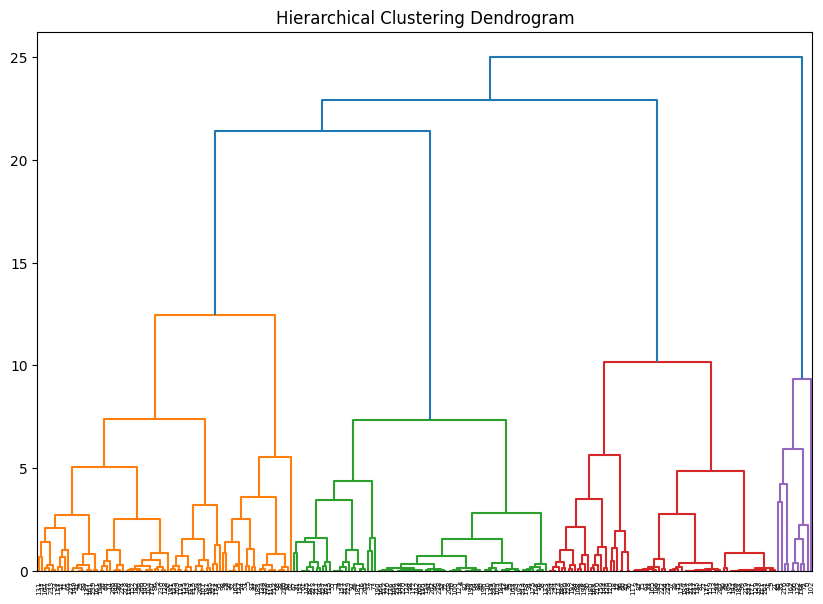

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Clustering
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


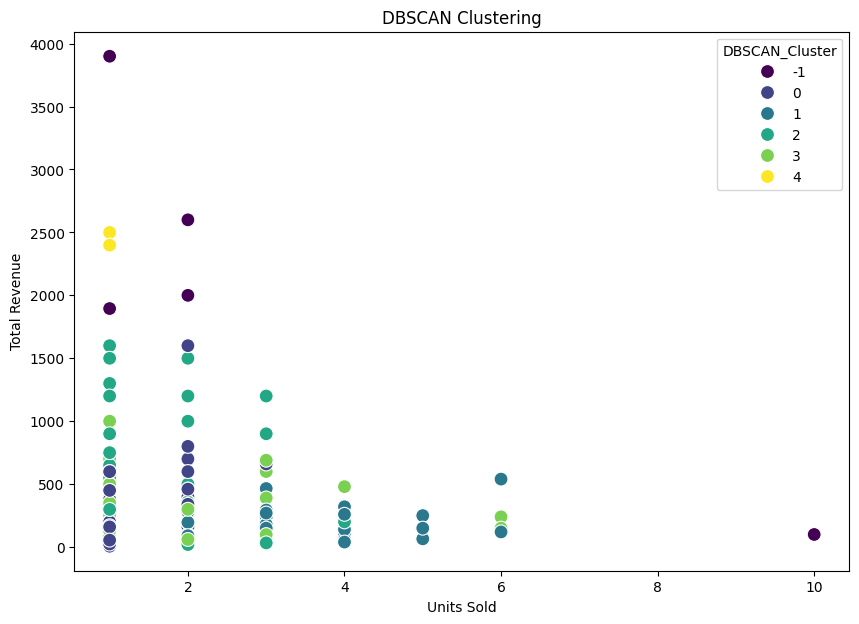

In [5]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.0, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Units Sold', y='Total Revenue', hue='DBSCAN_Cluster', data=df, palette='viridis', s=100)
plt.title('DBSCAN Clustering')
plt.show()


In [6]:
#Evaluation

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Silhouette Score
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)

# Davies-Bouldin Index
dbi_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)
dbi_dbscan = davies_bouldin_score(X_scaled, dbscan_labels)

# Calinski-Harabasz Index
ch_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)
ch_dbscan = calinski_harabasz_score(X_scaled, dbscan_labels)

print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")

print(f"K-Means Davies-Bouldin Index: {dbi_kmeans}")
print(f"DBSCAN Davies-Bouldin Index: {dbi_dbscan}")

print(f"K-Means Calinski-Harabasz Index: {ch_kmeans}")
print(f"DBSCAN Calinski-Harabasz Index: {ch_dbscan}")


K-Means Silhouette Score: 0.3899354909563962
DBSCAN Silhouette Score: 0.46241040764340063
K-Means Davies-Bouldin Index: 0.9864162298617569
DBSCAN Davies-Bouldin Index: 1.221368150200558
K-Means Calinski-Harabasz Index: 110.2041932249505
DBSCAN Calinski-Harabasz Index: 83.89599936503917
